# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [0]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [0]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [0]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [0]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [13]:
results = {}
optmizers = ['SGD', 'RMSprop', 'AdaGrad', 'Adadelta', 'Adam']
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for i, opt in enumerate(optmizers):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    model = build_mlp(input_shape=x_train.shape[1:])
    
    print(opt)
    if i==0:
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    elif i==1:
        optimizer = keras.optimizers.RMSprop(lr=LEARNING_RATE, rho=0.9, epsilon=None, decay=0.0)
    elif i==2:
        optimizer = keras.optimizers.Adagrad(lr=LEARNING_RATE, epsilon=None, decay=0.0)
    elif i==3:
        optimizer = keras.optimizers.Adadelta(lr=LEARNING_RATE, rho=0.95, epsilon=None, decay=0.0)
    elif i==4:
        optimizer = keras.optimizers.Adam(lr=LEARNING_RATE, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)     
    
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    results[opt] = {'train-loss': train_loss,
                    'valid-loss': valid_loss,
                    'train-acc': train_acc,
                    'valid-acc': valid_acc}

SGD
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 2s 41us/step - loss: 2.0486 - acc: 0.2690 - val_loss: 1.8778 - val_acc: 0.3389
Epoch 2/50
50000/50000 [==============================] - 2s 36us/step - loss: 1.8206 - acc: 0.3587 - val_loss: 1.7726 - val_acc: 0.3763
Epoch 3/50
50000/50000 [==============================] - 2s 35us/step - loss: 1.7361 - acc: 0.3906 - val_loss: 1.7171 - val_acc: 0.3963
Epoch 4/50
50000/50000 [==============================] - 2s 36us/step - loss: 1.6773 - acc: 0.4128 - val_loss: 1.6613 - val_acc: 0.4128
Epoch 5/50
50000/50000 [==============================] - 2s 35us/step - loss: 1.6297 - acc: 0.4295 - val_loss: 1.6071 - val_acc: 0.4352
Epoch 6/50
50000/50000 [==============================] - 2s 35us/step - loss: 1.5875 - acc: 0.4431 - val_loss: 1.5793 - val_acc: 0.4469
Epoch 7/50
50000/50000 [==============================] - 2s 36us/step - loss: 1.5531 - acc: 0.4539 - val_loss: 1.5637 - val

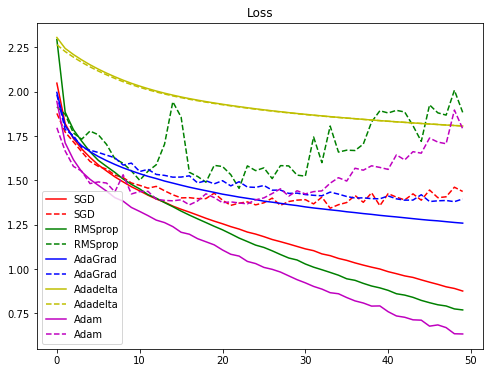

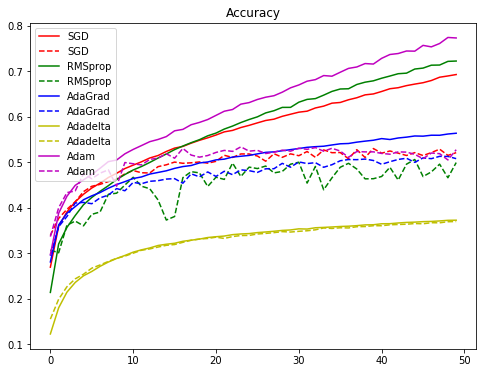

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend();

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend();